목적 : All data Winsorizing
=====================
목표 : Q-Qplot 보면서 Winsorizing
-------------------------    

import modules

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

import platform
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats
from scipy.stats import shapiro, pearsonr
from itertools import combinations
from sklearn.model_selection import train_test_split

환경설정

In [2]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')

pd.set_option('display.max_seq_items', None)

pd.set_option('float_format', '{:.3f}'.format) # 소수점 3개까지 출력

load file

In [5]:
all = pd.read_csv("../data/datasets/All_data.csv", index_col=0)
# 영업년수만 있고 상장년수가 없더라. 공통변수만 넣었나보다

In [6]:
all.columns

Index(['회사명', '거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본영업이익률', '매출액영업이익률',
       '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율', '비유동자산증가율', '매출액증가율',
       '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율', '부가가치율', '이윤분배율', '자본분배율',
       '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율', '경영자본회전률', '총자본회전률',
       '비유동자산회전률', '유동자산회전률', '영업년수', '부실판단', '도입기', '성숙기', '성장기', '쇠퇴기'],
      dtype='object')

# train test split

In [7]:
X = all.drop('부실판단', axis=1)
y = all['부실판단']
# 데이터를 학습용과 테스트용으로 나눔
all_X_train, all_X_test, all_y_train, all_y_test = train_test_split(X, y, test_size= 1 / (np.exp(1) + 1) , random_state=911, stratify=y)

In [8]:
all_X_train['부실판단'] = all_y_train

In [35]:
all_X_train.to_csv("../data/datasets/all_train.csv", index=False)

In [9]:
all_X_test['부실판단'] = all_y_test

In [10]:
all_X_test.to_csv("../data/datasets/all_data_test.csv", index=False)
# 결측치를 있는 그대로 넣었다

# describe

In [11]:
all_X_train

,회사명,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,...,경영자본회전률,총자본회전률,비유동자산회전률,유동자산회전률,영업년수,도입기,성숙기,성장기,쇠퇴기,부실판단
20157,정화폴리테크공업(주),47636,2022,30.330,245.060,4.910,5.390,213.890,176.450,19.310,...,1.000,0.950,1.380,3.070,32.000,0,1,0,0,0.000
6820,지이티플러스(주),45156,2017,-17.170,-29.660,-7.370,-8.700,153.670,81.710,75.260,...,1.350,0.830,1.720,1.590,20.000,0,0,0,1,1.000
9196,로터코리아주식회사,64258,2022,12.490,0.000,1.200,0.940,1074.120,703.470,10.620,...,1.140,1.140,67.710,1.160,14.000,0,1,0,0,0.000
15736,(주)영동텍스타일,98733,2022,8.020,10.520,5.230,7.480,61.130,58.920,187.640,...,0.740,0.730,0.960,3.130,24.000,0,0,1,0,0.000
10315,문경관광개발주식회사,38550,2022,108.680,0.000,6.890,18.180,538.760,538.410,6.770,...,0.930,0.380,0.570,1.150,21.000,0,1,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8899,동우당제약주식회사,97115,2021,-5.770,-9.780,-4.170,-7.840,129.090,51.910,260.420,...,0.520,0.510,1.410,0.810,22.000,1,0,0,0,1.000
76,주식회사세종피앤디,66463,2015,10391.230,0.000,157.970,163.920,6302.440,6302.440,1.540,...,0.290,0.290,29.640,0.290,13.000,0,1,0,0,0.000
747,주식회사에버스핀,90306,2020,-70.670,-977.650,-3.870,-168.150,3626.780,3626.780,5.790,...,0.020,0.020,0.400,0.020,10.000,0,0,0,1,1.000
6196,(주)코팅코리아,53396,2022,85.170,0.000,17.730,14.920,273.330,173.740,26.300,...,1.200,1.200,2.650,2.210,24.000,0,1,0,0,0.000


In [12]:
all_X_train.describe()

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,경영자본회전률,총자본회전률,비유동자산회전률,유동자산회전률,영업년수,도입기,성숙기,성장기,쇠퇴기,부실판단
count,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,...,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000
mean,70226.404,2019.841,28.380,1438.125,3.366,-22.092,375.612,310.244,1397.700,1017.491,...,1.114,0.993,26.827,2.764,21.495,0.222,0.360,0.193,0.225,0.366
std,35386.737,2.821,981.334,80130.012,45.580,531.383,3677.845,3587.011,34834.719,29604.774,...,1.580,1.409,817.485,4.622,11.420,0.415,0.480,0.395,0.418,0.482
min,40.000,2014.000,-6947.250,-940370.860,-3388.620,-21110.050,0.050,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,52478.500,2018.000,-4.643,-5.280,-2.980,-5.000,57.535,32.445,58.718,35.418,...,0.340,0.280,0.510,1.010,13.000,0.000,0.000,0.000,0.000,0.000
50%,71045.000,2022.000,2.865,1.480,1.800,2.290,109.900,74.215,158.595,101.070,...,0.850,0.750,1.470,1.980,20.000,0.000,0.000,0.000,0.000,0.000
75%,87659.500,2022.000,14.652,17.840,7.312,10.615,201.123,153.433,361.310,232.605,...,1.420,1.280,3.730,3.270,27.000,0.000,1.000,0.000,0.000,1.000
max,900340.000,2022.000,113999.840,7382816.570,3157.270,21579.540,313157.770,310519.860,3385006.150,2905990.690,...,106.800,92.050,93448.220,344.060,113.000,1.000,1.000,1.000,1.000,1.000


In [13]:
all_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15672 entries, 20157 to 8658
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                15672 non-null  object 
 1   거래소코드              15672 non-null  int64  
 2   회계년도               15672 non-null  int64  
 3   CASH FLOW 대 부채비율   15672 non-null  float64
 4   CASH FLOW 대 차입금비율  15672 non-null  float64
 5   CASH FLOW 대 총자본비율  15672 non-null  float64
 6   CASH FLOW 대 매출액비율  15672 non-null  float64
 7   유동비율               15672 non-null  float64
 8   당좌비율               15672 non-null  float64
 9   부채비율               15672 non-null  float64
 10  유동부채비율             15672 non-null  float64
 11  차입금의존도             15672 non-null  float64
 12  순운전자본비율            15672 non-null  float64
 13  현금비율               15672 non-null  float64
 14  유동자산구성비율           15672 non-null  float64
 15  자기자본구성비율           15672 non-null  float64
 16  자기자본순이익률           15672

In [14]:
all_X_train.columns

Index(['회사명', '거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본영업이익률', '매출액영업이익률',
       '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율', '비유동자산증가율', '매출액증가율',
       '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율', '부가가치율', '이윤분배율', '자본분배율',
       '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율', '경영자본회전률', '총자본회전률',
       '비유동자산회전률', '유동자산회전률', '영업년수', '도입기', '성숙기', '성장기', '쇠퇴기', '부실판단'],
      dtype='object')

In [15]:
all_X_train.isna().sum().sort_values(ascending=False)

회사명                  0
매출채권회전률              0
비유동자산증가율             0
매출액증가율               0
유형자산증가율              0
부가가치(백만원)            0
총자본투자효율              0
설비투자효율               0
부가가치율                0
이윤분배율                0
자본분배율                0
총자산회전율               0
당좌자산회전률              0
거래소코드                0
유형자산회전율              0
경영자본회전률              0
총자본회전률               0
비유동자산회전률             0
유동자산회전률              0
영업년수                 0
도입기                  0
성숙기                  0
성장기                  0
쇠퇴기                  0
유동자산증가율              0
총자본증가율               0
총자산증가율               0
CROE                 0
회계년도                 0
CASH FLOW 대 부채비율     0
CASH FLOW 대 차입금비율    0
CASH FLOW 대 총자본비율    0
CASH FLOW 대 매출액비율    0
유동비율                 0
당좌비율                 0
부채비율                 0
유동부채비율               0
차입금의존도               0
순운전자본비율              0
현금비율                 0
유동자산구성비율             0
자기자본구성비율             0
자기자본순이익률             0
경영자본순이익률   

In [16]:
all_X_train.isin([0]).sum().sort_values(ascending=False)

성장기                  12649
도입기                  12196
쇠퇴기                  12145
성숙기                  10026
부실판단                  9933
자본분배율                 1738
이윤분배율                 1533
총자산회전율                1375
총자산증가율                1374
차입금의존도                1335
CASH FLOW 대 차입금비율     1312
매출채권회전률               1210
자기자본순이익률               789
유동부채비율                 629
자기자본구성비율               629
부채비율                   628
유형자산증가율                340
총자본회전률                 239
설비투자효율                 195
유형자산회전율                194
경영자본회전률                162
매출액증가율                 154
현금비율                    90
금융비용부담률                 79
비유동자산회전률                73
유동자산회전률                 60
비유동자산증가율                57
당좌자산회전률                 36
CASH FLOW 대 총자본비율       29
총자본증가율                  21
CASH FLOW 대 매출액비율       19
영업년수                    16
유동자산증가율                 14
CASH FLOW 대 부채비율        13
총자본사업이익률                 9
CROE                     7
총자본영업이익률                 7
순

In [17]:
all_X_train.isin([np.inf]).sum().sort_values(ascending=False)

총자산증가율               1
매출채권회전률              0
비유동자산증가율             0
매출액증가율               0
유형자산증가율              0
부가가치(백만원)            0
총자본투자효율              0
설비투자효율               0
부가가치율                0
이윤분배율                0
자본분배율                0
총자산회전율               0
회사명                  0
유동자산증가율              0
유형자산회전율              0
경영자본회전률              0
총자본회전률               0
비유동자산회전률             0
유동자산회전률              0
영업년수                 0
도입기                  0
성숙기                  0
성장기                  0
쇠퇴기                  0
당좌자산회전률              0
총자본증가율               0
거래소코드                0
CROE                 0
회계년도                 0
CASH FLOW 대 부채비율     0
CASH FLOW 대 차입금비율    0
CASH FLOW 대 총자본비율    0
CASH FLOW 대 매출액비율    0
유동비율                 0
당좌비율                 0
부채비율                 0
유동부채비율               0
차입금의존도               0
순운전자본비율              0
현금비율                 0
유동자산구성비율             0
자기자본구성비율             0
자기자본순이익률             0
경영자본순이익률   

In [19]:
inf_col = all_X_train.isin([np.inf]).sum().sort_values(ascending=False).index[0]
max_value = all_X_train[inf_col].replace(np.inf, np.nan).max()
all_X_train[inf_col] = all_X_train[inf_col].replace(np.inf, max_value)

# 범주 분할 1현금흐름 / 2안정성 / 2수익성 / 3유동성 / 4성장성 / 5생산성 / 6활동성 / 7시장지표 및 기타

In [20]:
# all data의 설명변수는 공통인 비상장 변수들
# 비상장 label들

# 비상장 피처
features = all_X_train.drop(
    labels=[
        '회사명',
        '거래소코드',
        '회계년도',        
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'        
    ],
    axis=1,    
)

# 1현금흐름 4개
cash_ft1 = all_X_train[
    [
        'CASH FLOW 대 부채비율',
        'CASH FLOW 대 차입금비율',
        'CASH FLOW 대 총자본비율',
        'CASH FLOW 대 매출액비율',
        '부실판단'
    ]
]

# 2안정성 9개
stability_ft1 = all_X_train[
    [
        '유동비율',
        '당좌비율',
        '부채비율',
        '유동부채비율',
        '차입금의존도',
        '순운전자본비율',
        '현금비율',
        '유동자산구성비율',
        '자기자본구성비율',
        '부실판단'
    ]
]

# 3수익성 8개
profitability_ft1 = all_X_train[
    [
        '자기자본순이익률',
        '경영자본순이익률',
        '매출액순이익률',
        '총자본사업이익률',
        '총자본영업이익률',
        '매출액영업이익률',
        '금융비용부담률',
        'CROE',
        '부실판단'
    ]
]

# 4성장성 6개
growth_ft1 = all_X_train[
    [
        '총자산증가율',
        '총자본증가율',
        '유동자산증가율',
        '비유동자산증가율',
        '매출액증가율',
        '유형자산증가율',
        '부실판단'
    ]
]

# 5생산성 6개
productivity_ft1 = all_X_train[
    [
        '부가가치(백만원)',
        '총자본투자효율',
        '설비투자효율',
        '부가가치율',
        '이윤분배율',
        '자본분배율',
        '부실판단'
    ]
]

# 6활동성 8개
activity_ft1 = all_X_train[
    [
        '총자산회전율',
        '매출채권회전률',
        '당좌자산회전률',
        '유형자산회전율',
        '경영자본회전률',
        '총자본회전률',
        '비유동자산회전률',
        '유동자산회전률',
        '부실판단'
    ]
]

# 7기타
etc_ft1 = all_X_train[
    [
        '영업년수', 
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'
    ]
]

1현금흐름 4가지 cash

In [21]:
cash_ft1.describe()

,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,부실판단
count,15672.000,15672.000,15672.000,15672.000,15672.000
mean,28.380,1438.125,3.366,-22.092,0.366
std,981.334,80130.012,45.580,531.383,0.482
min,-6947.250,-940370.860,-3388.620,-21110.050,0.000
25%,-4.643,-5.280,-2.980,-5.000,0.000
50%,2.865,1.480,1.800,2.290,0.000
75%,14.652,17.840,7.312,10.615,1.000
max,113999.840,7382816.570,3157.270,21579.540,1.000


2안정성 9가지 stability

In [22]:
stability_ft1.describe()

,유동비율,당좌비율,부채비율,유동부채비율,차입금의존도,순운전자본비율,현금비율,유동자산구성비율,자기자본구성비율,부실판단
count,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000
mean,375.612,310.244,1397.700,1017.491,42.598,0.701,73.068,46.102,39.449,0.366
std,3677.845,3587.011,34834.719,29604.774,208.399,292.938,719.466,33.368,26.257,0.482
min,0.050,0.000,0.000,0.000,0.000,-36261.200,-3.490,0.000,-98.000,0.000
25%,57.535,32.445,58.718,35.418,16.645,-18.810,1.680,22.570,18.800,0.000
50%,109.900,74.215,158.595,101.070,41.050,3.440,9.140,44.005,35.740,0.000
75%,201.123,153.433,361.310,232.605,60.812,27.570,34.060,68.000,58.352,1.000
max,313157.770,310519.860,3385006.150,2905990.690,25856.360,186.000,46146.870,2198.000,99.910,1.000


3수익성 8가지 profitability

In [23]:
productivity_ft1.describe()

,부가가치(백만원),총자본투자효율,설비투자효율,부가가치율,이윤분배율,자본분배율,부실판단
count,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000
mean,6950.716,29.356,520722.664,41.111,-66.841,14.545,0.366
std,346157.460,1641.030,33574592.677,690.738,1711.201,992.310,0.482
min,-144498.040,-411.000,-229811958.000,-6073.050,-190075.000,-116701.000,0.000
25%,923.705,4.780,9.080,7.890,-1.232,19.168,0.000
50%,2329.430,11.070,29.340,16.150,10.730,54.370,0.000
75%,5101.905,19.370,99.420,33.000,35.133,74.233,1.000
max,43327598.520,205392.780,4053778655.000,70947.820,3881.030,175.060,1.000


4성장성 6개 growth

In [24]:
growth_ft1.describe()

,총자산증가율,총자본증가율,유동자산증가율,비유동자산증가율,매출액증가율,유형자산증가율,부실판단
count,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000
mean,5.492,6.070,199.434,229.359,193.767,184440.957,0.366
std,34.704,36.773,20228.589,6089.114,9510.577,20668019.366,0.482
min,-100.000,-99.890,-99.900,-100.000,-99.910,-100.000,0.000
25%,-4.603,-5.662,-14.502,-5.360,-12.860,-5.850,0.000
50%,0.437,1.745,3.660,-0.080,3.595,-1.100,0.000
75%,11.205,12.710,24.170,12.692,21.860,8.318,1.000
max,1026.841,1026.840,2531488.340,444446.460,900275.000,2580453089.000,1.000


5생산성 6가지 productivity

In [25]:
productivity_ft1.describe()

,부가가치(백만원),총자본투자효율,설비투자효율,부가가치율,이윤분배율,자본분배율,부실판단
count,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000
mean,6950.716,29.356,520722.664,41.111,-66.841,14.545,0.366
std,346157.460,1641.030,33574592.677,690.738,1711.201,992.310,0.482
min,-144498.040,-411.000,-229811958.000,-6073.050,-190075.000,-116701.000,0.000
25%,923.705,4.780,9.080,7.890,-1.232,19.168,0.000
50%,2329.430,11.070,29.340,16.150,10.730,54.370,0.000
75%,5101.905,19.370,99.420,33.000,35.133,74.233,1.000
max,43327598.520,205392.780,4053778655.000,70947.820,3881.030,175.060,1.000


6활동성 8가지 activity

In [26]:
activity_ft1.describe()

,총자산회전율,매출채권회전률,당좌자산회전률,유형자산회전율,경영자본회전률,총자본회전률,비유동자산회전률,유동자산회전률,부실판단
count,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000
mean,0.938,655.315,4.194,7275.597,1.114,0.993,26.827,2.764,0.366
std,1.656,45239.275,7.257,235312.948,1.580,1.409,817.485,4.622,0.482
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.174,3.950,1.420,0.700,0.340,0.280,0.510,1.010,0.000
50%,0.654,7.090,2.840,2.090,0.850,0.750,1.470,1.980,0.000
75%,1.226,13.250,4.880,7.002,1.420,1.280,3.730,3.270,1.000
max,100.540,5386048.240,344.060,19823298.290,106.800,92.050,93448.220,344.060,1.000


7기타 etc

In [27]:
etc_ft1.describe()

,영업년수,도입기,성숙기,성장기,쇠퇴기,부실판단
count,15672.000,15672.000,15672.000,15672.000,15672.000,15672.000
mean,21.495,0.222,0.360,0.193,0.225,0.366
std,11.420,0.415,0.480,0.395,0.418,0.482
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,13.000,0.000,0.000,0.000,0.000,0.000
50%,20.000,0.000,0.000,0.000,0.000,0.000
75%,27.000,0.000,1.000,0.000,0.000,1.000
max,113.000,1.000,1.000,1.000,1.000,1.000


# QQplot

## before Q-Qplot

In [28]:
def qq_plot(df):
    fig, axes = plt.subplots(8, 6, figsize=(20, 25))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # 서브플롯 간 간격 조정
    
    for i in range(8):
        for j in range(6):
            col_index = i * 6 + j
            if col_index < len(df.columns):
                # Q-Q plot 그리기
                stats.probplot(df[df.columns[col_index]], dist="norm", plot=axes[i, j])
                axes[i, j].set_title(f"{df.columns[col_index]}")
            else:
                # 데이터프레임 칼럼 수보다 많은 서브플롯은 숨김
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

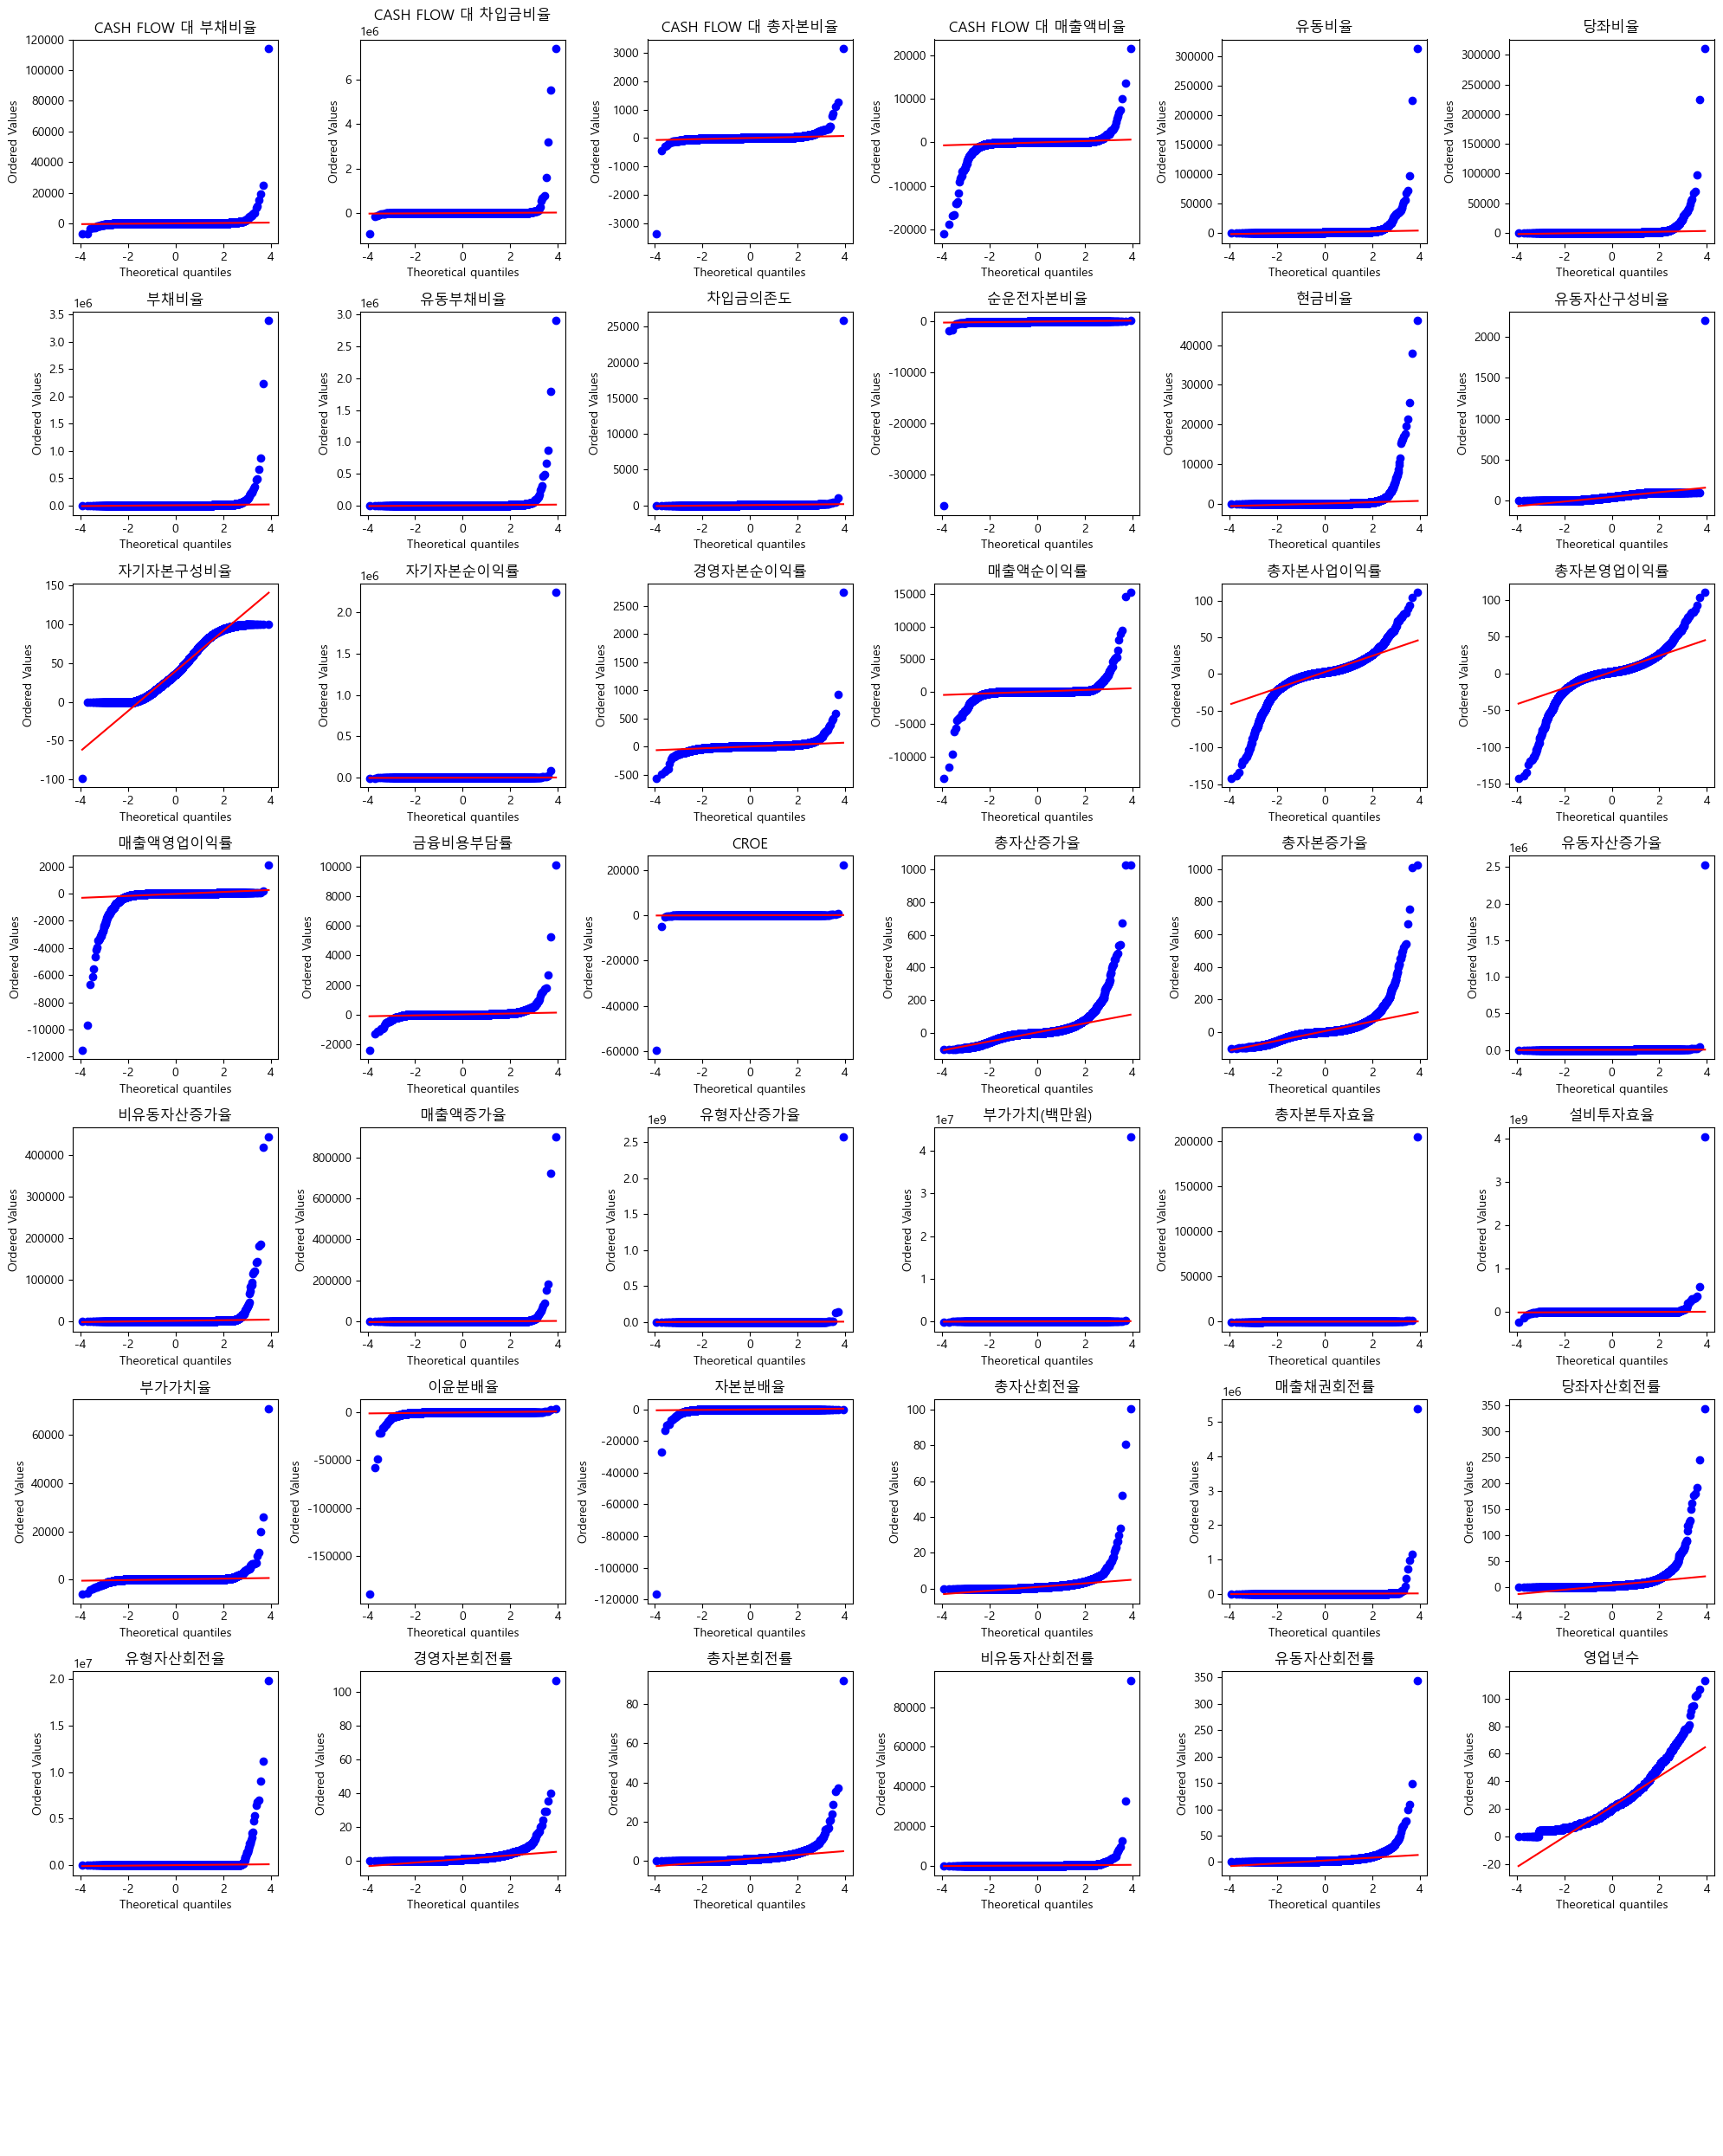

In [29]:
qq_plot(features)

## 윈저라이징

In [30]:
# 한 컬럼마다 할 수 있는 윈저라이징
def winsorize(data, lower_percentile=1, upper_percentile=1):
    """
    이상치를 Winsorizing하여 데이터를 변형하는 함수
    
    Parameters:
    - data: 변형하려는 데이터 배열
    - lower_percentile: 이상치를 대체할 하한 백분위수
    - upper_percentile: 이상치를 대체할 상한 백분위수
    
    Returns:
    - winsorized_data: Winsorizing이 적용된 데이터 배열
    """
    lower_limit = np.percentile(data, lower_percentile)
    upper_limit = np.percentile(data, 100 - upper_percentile)
    
    daco = data.copy()
    # 하한 이상치 대체
    daco[daco < lower_limit] = lower_limit
    
    # 상한 이상치 대체
    daco[daco > upper_limit] = upper_limit
    
    return daco

In [31]:
# 모든 컬럼을 일괄 윈저라이징
def adj_outlier(df, target=0.01, winsorizing=True):
    """
    데이터프레임에서 이상치를 조정합니다.

    매개변수:
    - dataframe: pandas DataFrame
    - 목표값: float, 이상치 식별을 위한 임계값
    - 윈저라이징: bool, 윈저라이징 기법을 적용할지 여부

    반환값:
    - 이상치가 조정된 pandas DataFrame
    """
    # 원본 DataFrame을 직접 수정하지 않기 위해 복사합니다.
    df_copy = df.copy()

    # 목표값에 기반하여 이상치를 식별합니다.    
    lower_bound = df_copy.quantile(target)
    upper_bound = df_copy.quantile(1 - target)

    # 윈저라이징이 지정된 경우 해당 열에 대해 이상치를 조정합니다.
    if winsorizing:
        df_copy = df_copy.apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]))

    return df_copy

# 예제 사용법:
# '당신의_데이터프레임'이 실제 데이터프레임인 경우
# 조정된_데이터프레임 = 이상치_조정(당신의_데이터프레임)

## 일괄 Q-Qplot

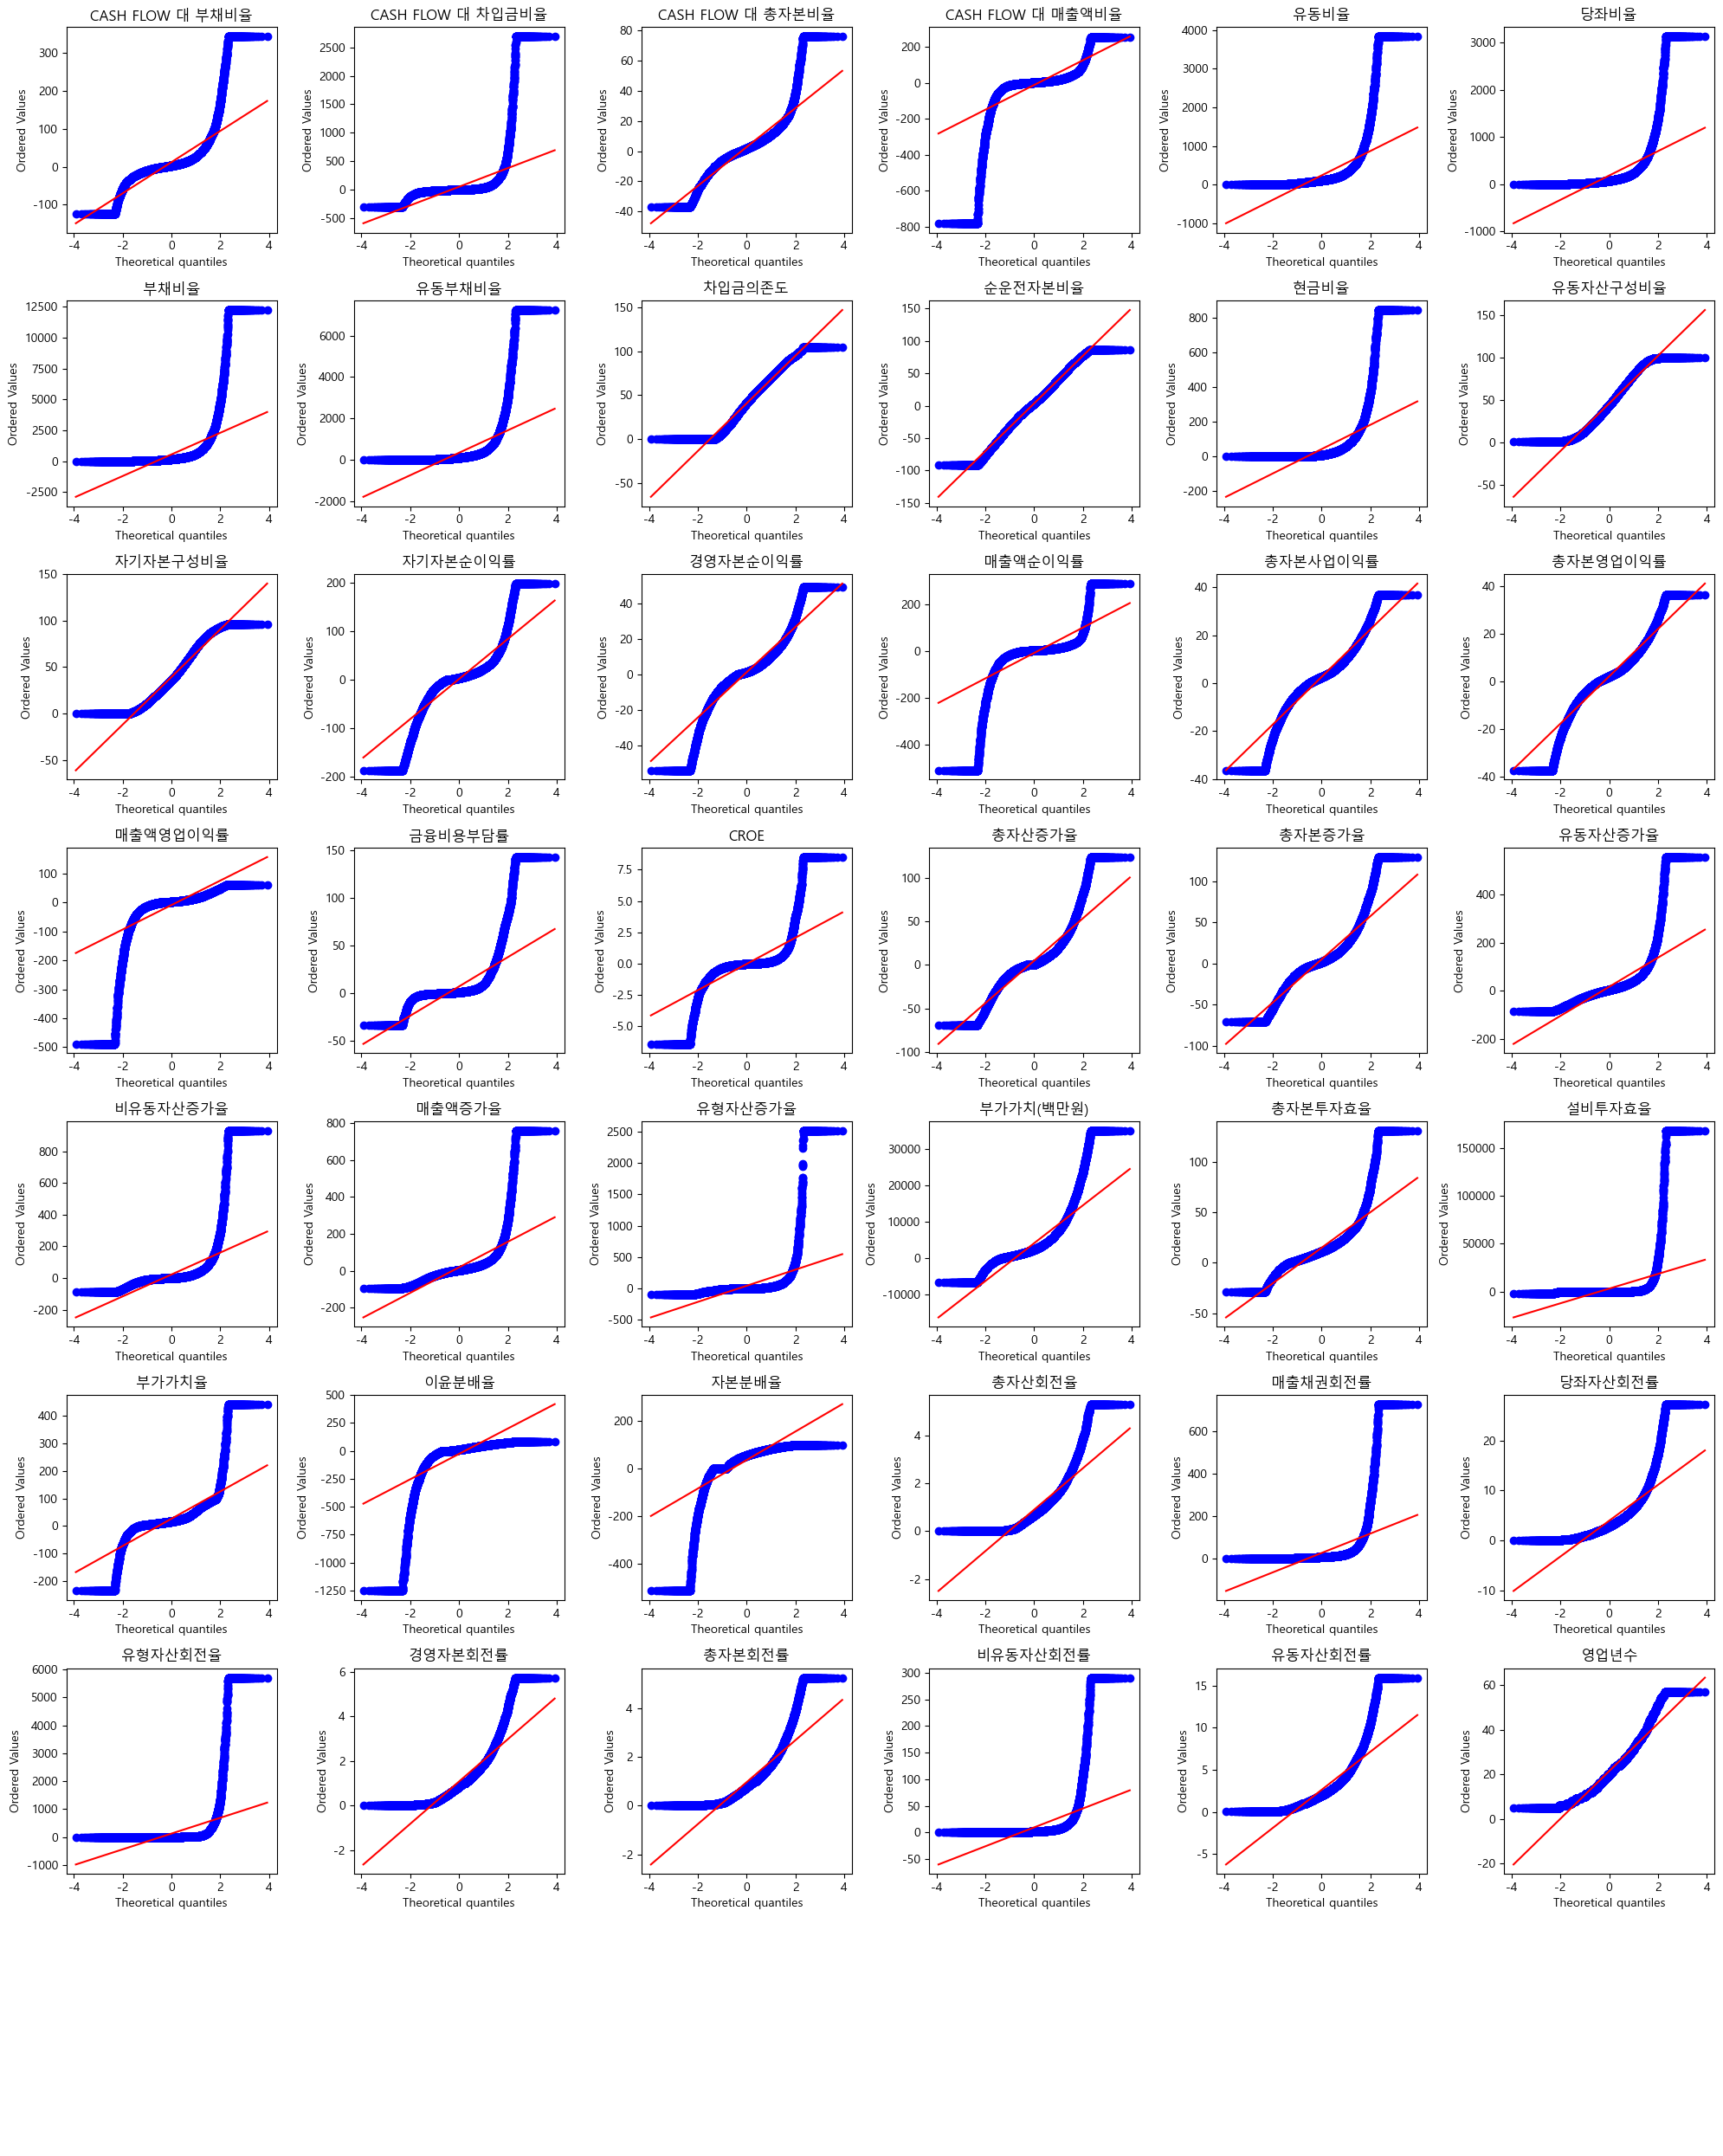

In [32]:
adj_features = adj_outlier(features, target=0.01, winsorizing=True)
qq_plot(adj_features)

## 컬럼별 윈저라이징

In [378]:
winsorized_features = features.copy()

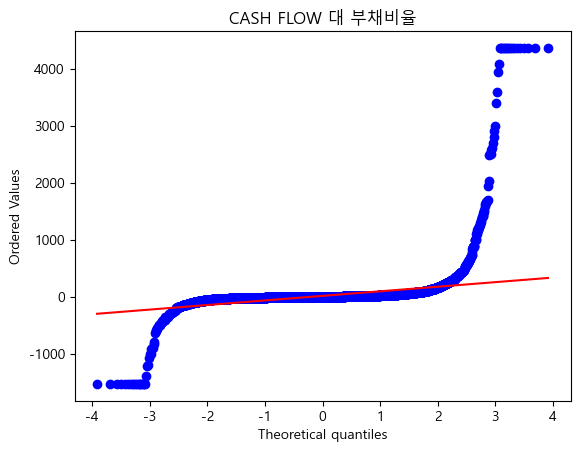

In [379]:
i = 0
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

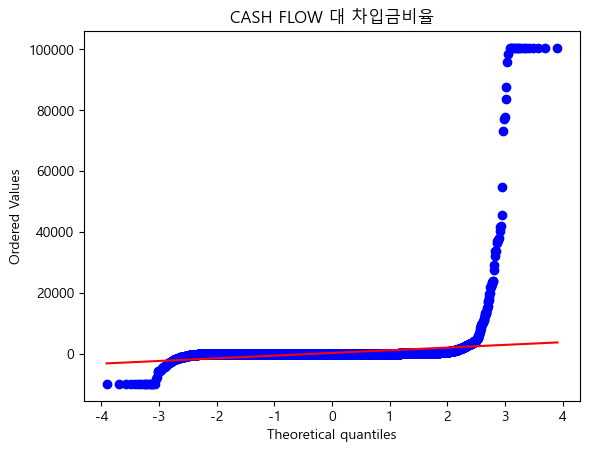

In [380]:
i = 1
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

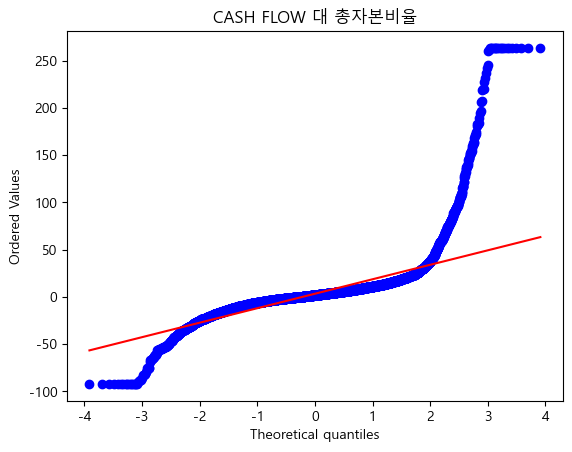

In [381]:
i = 2
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

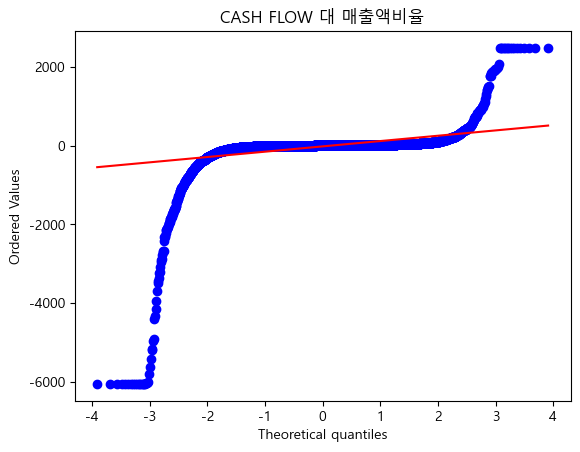

In [382]:
i = 3
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

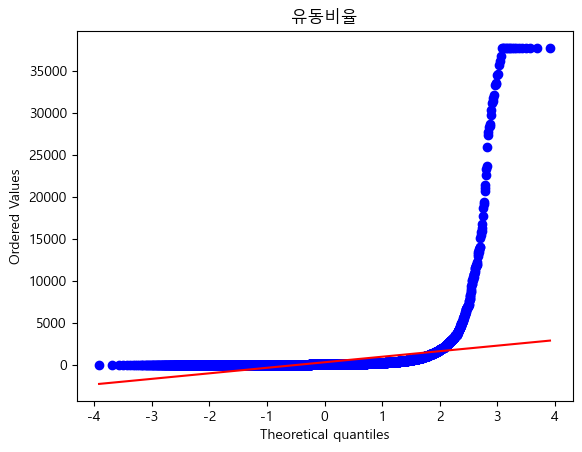

In [383]:
i = 4
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

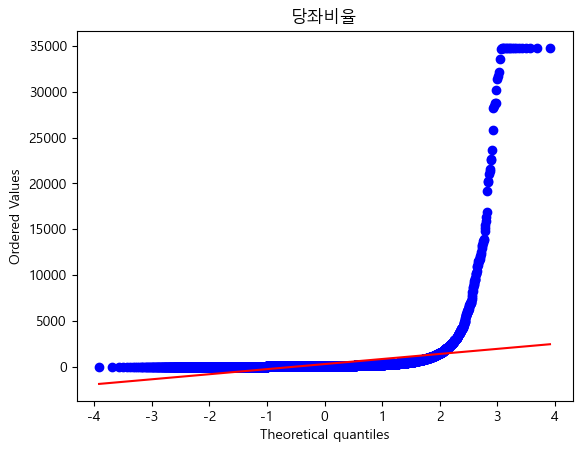

In [384]:
i = 5
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

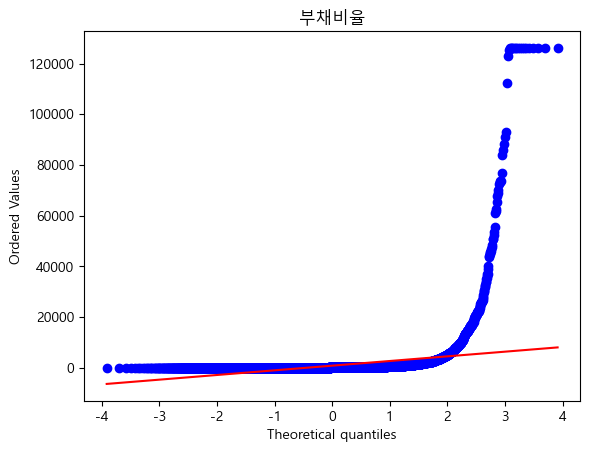

In [385]:
i = 6
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

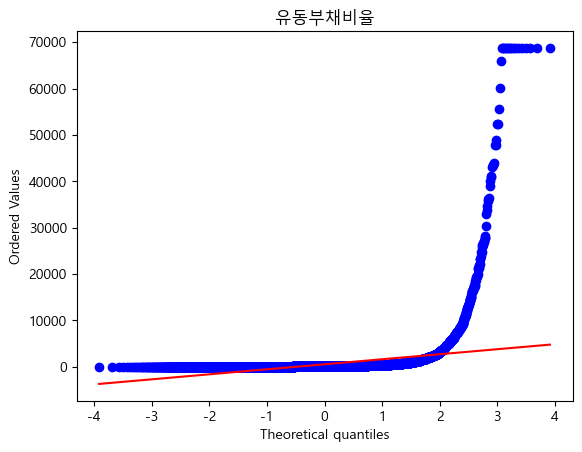

In [386]:
i = 7
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

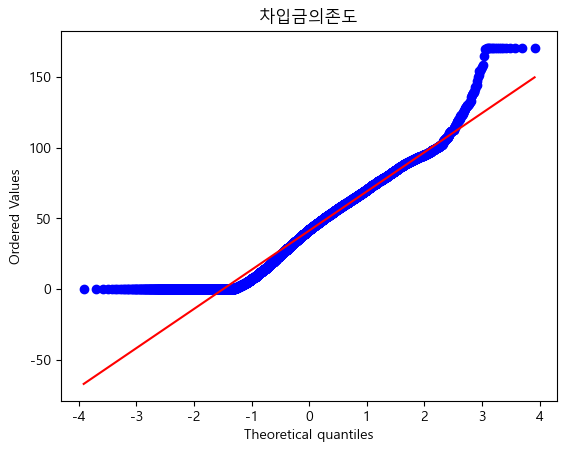

In [387]:
i = 8
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

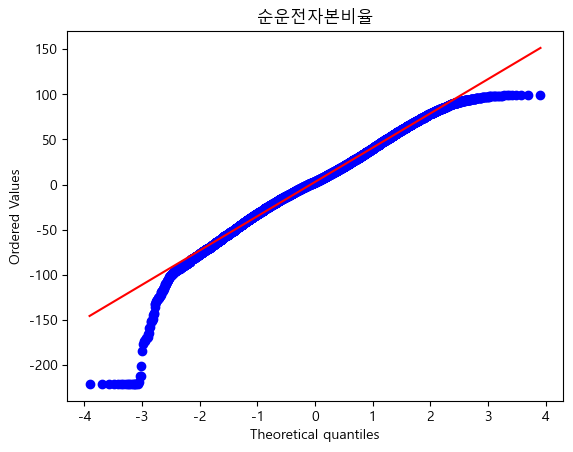

In [388]:
i = 9
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

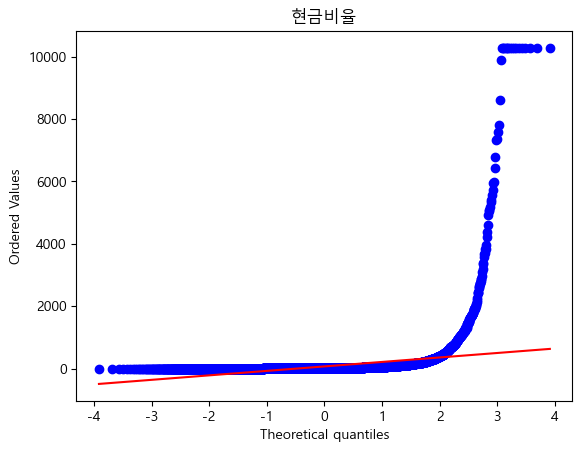

In [389]:
i = 10
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

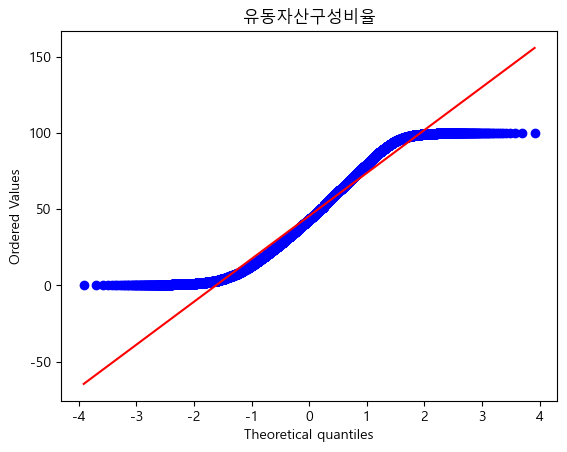

In [390]:
i = 11
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.999)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

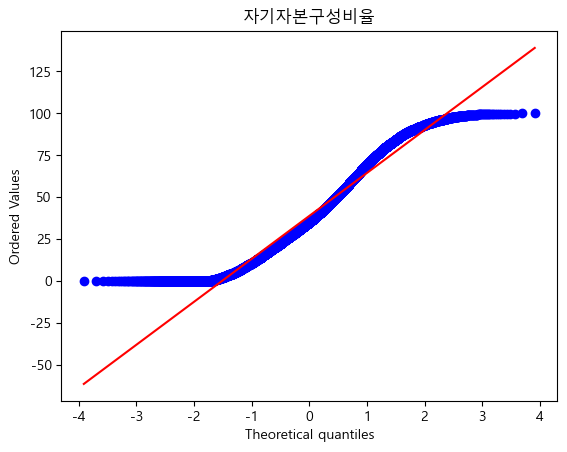

In [391]:
i = 12
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=100)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

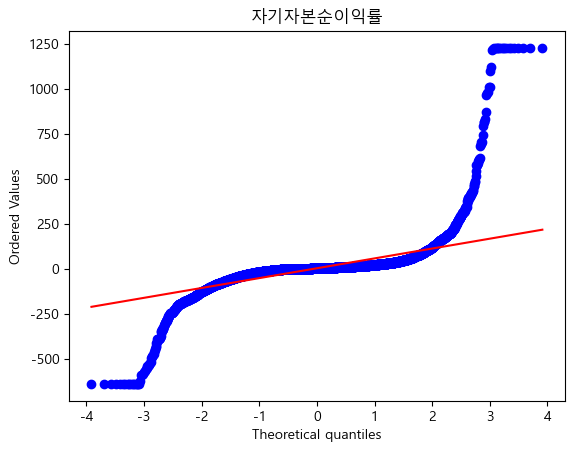

In [392]:
i = 13
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

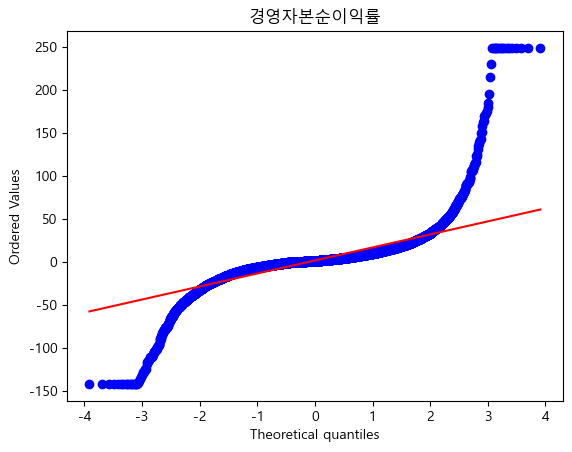

In [393]:
i = 14
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

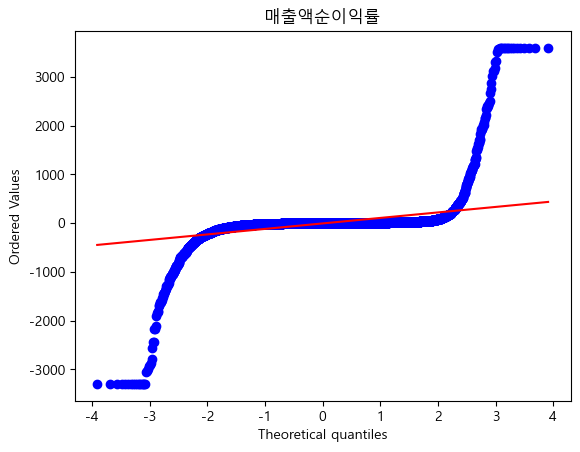

In [394]:
i = 15
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

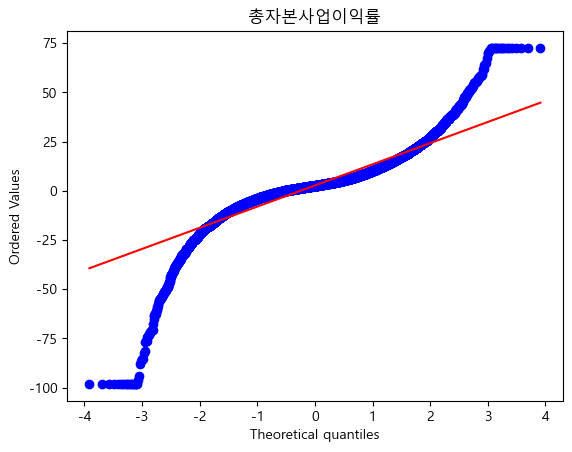

In [395]:
i = 16
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

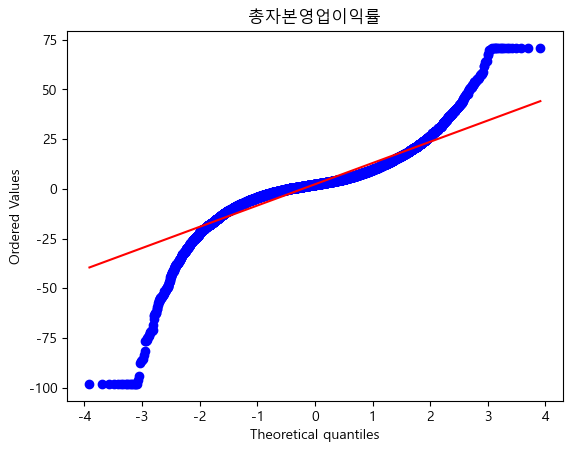

In [396]:
i = 17
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

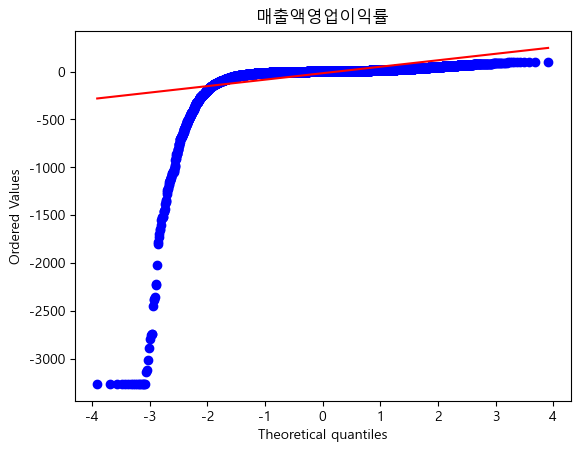

In [397]:
i = 18
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

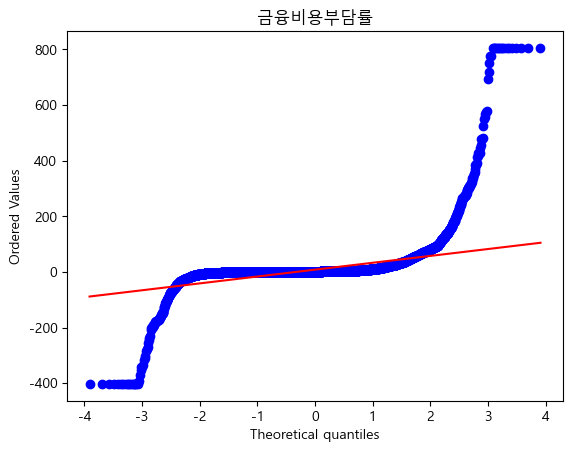

In [398]:
i = 19
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

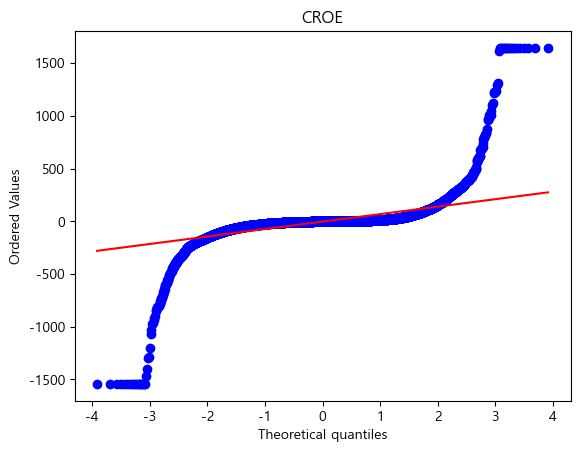

In [399]:
i = 20
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

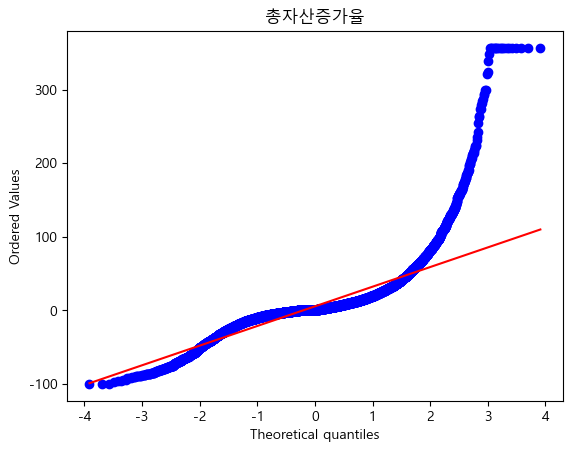

In [400]:
i = 21
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

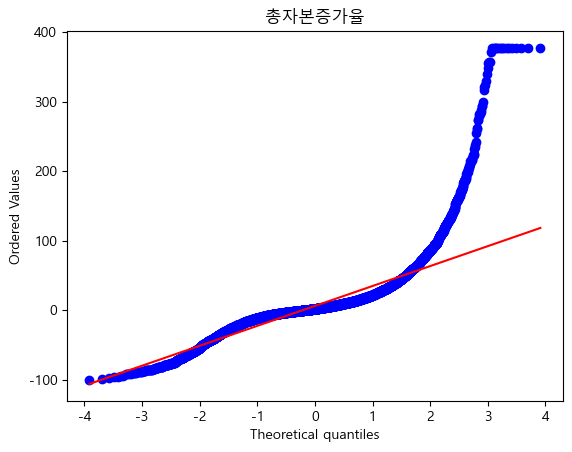

In [401]:
i = 22
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

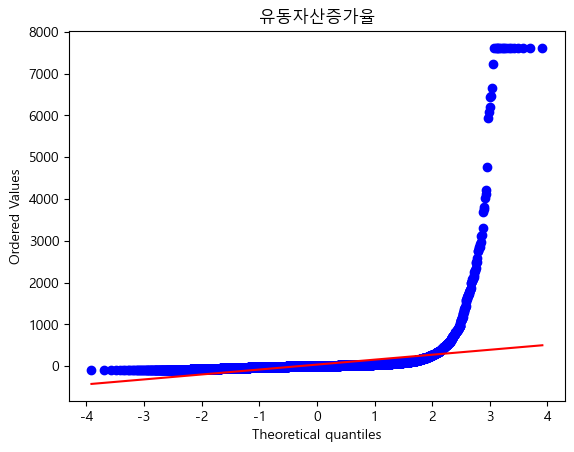

In [402]:
i = 23
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

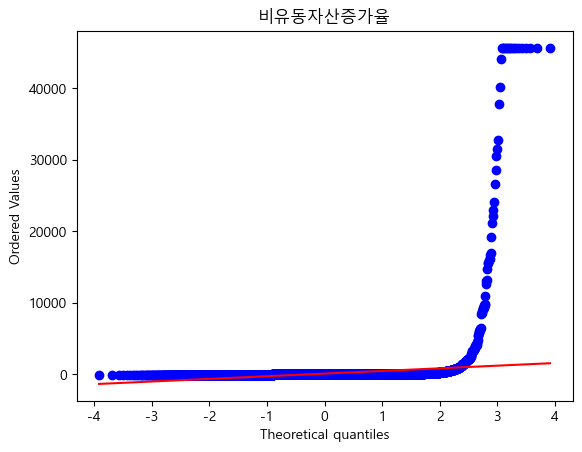

In [403]:
i = 24
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

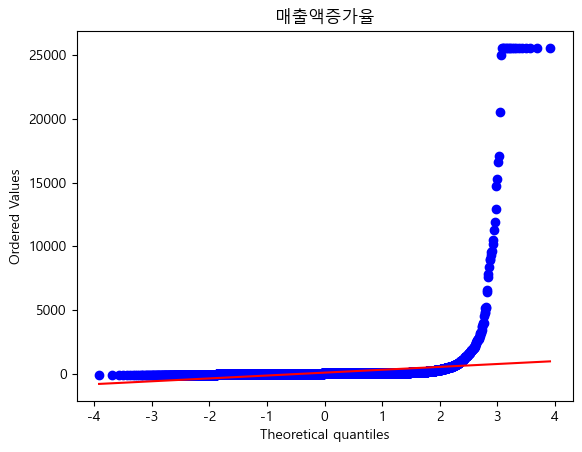

In [404]:
i = 25
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

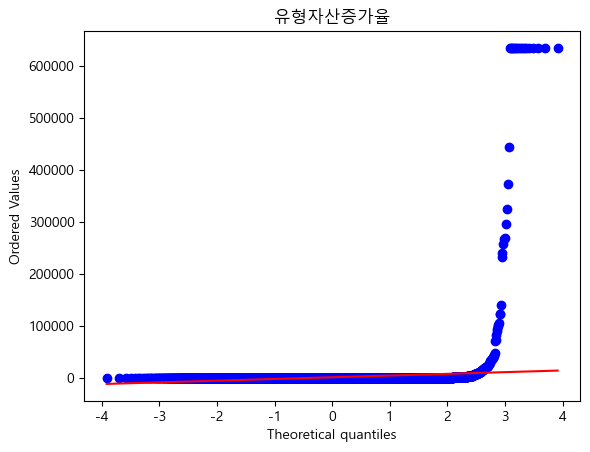

In [405]:
i = 26
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

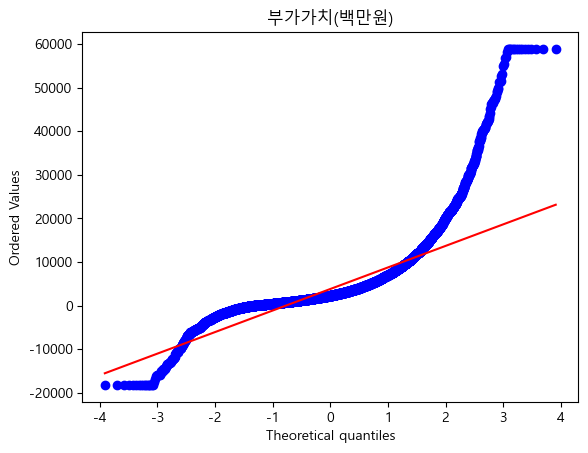

In [406]:
i = 27
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

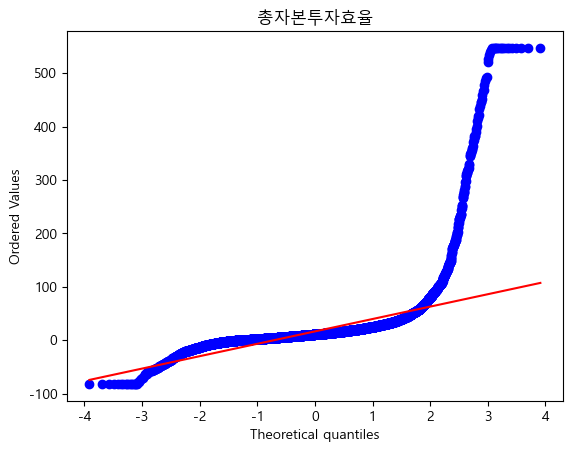

In [407]:
i = 28
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

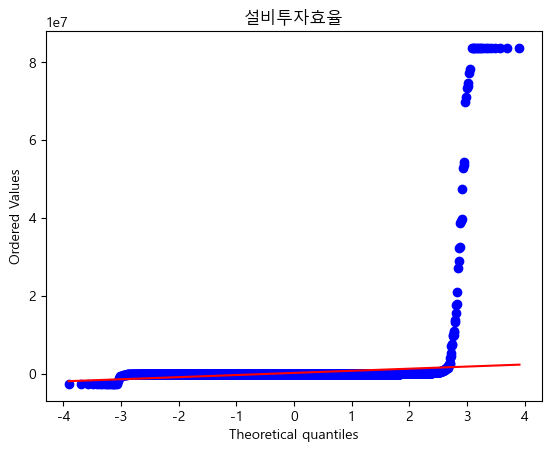

In [408]:
i = 29
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

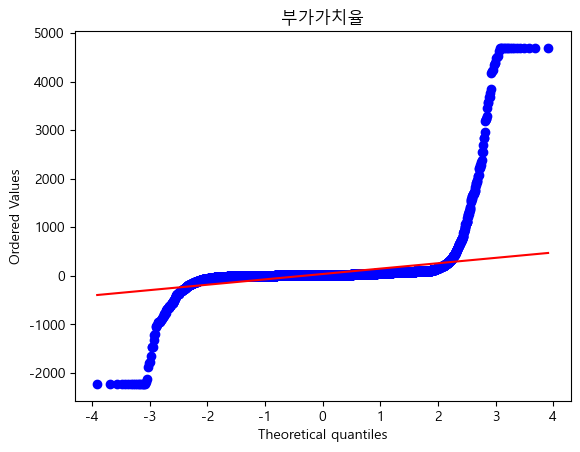

In [409]:
i = 30
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

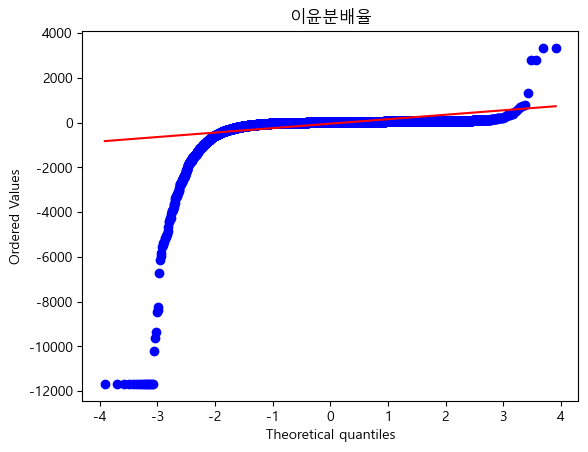

In [410]:
i = 31
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

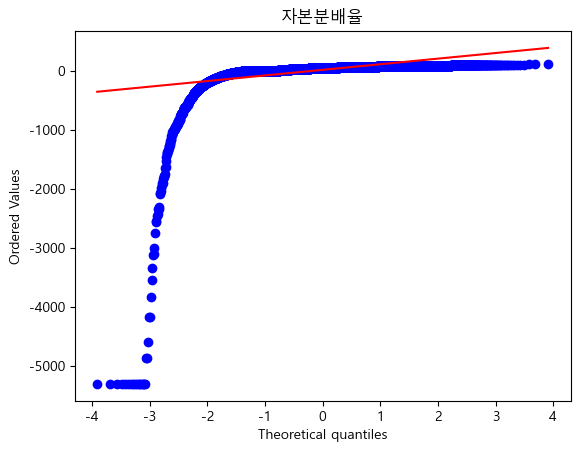

In [411]:
i = 32
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.1, upper_percentile=99.999)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

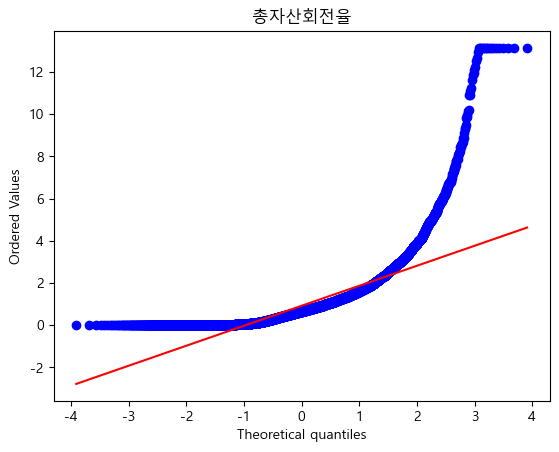

In [412]:
i = 33
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

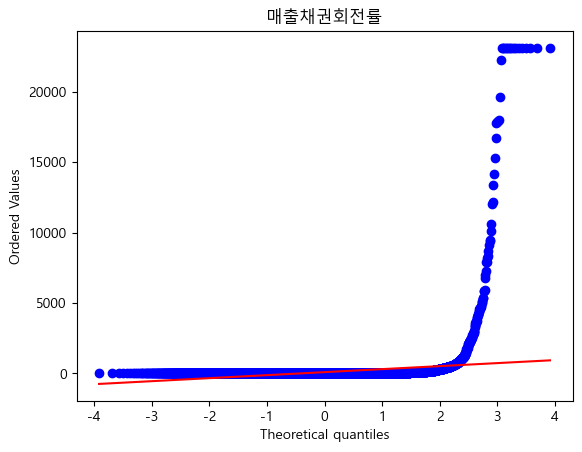

In [413]:
i = 34
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

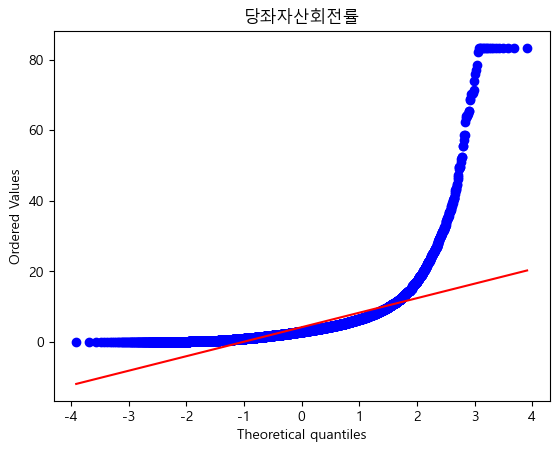

In [414]:
i = 35
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

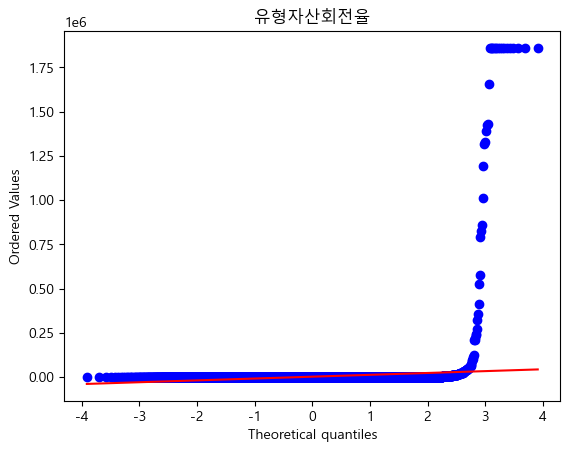

In [415]:
i = 36
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

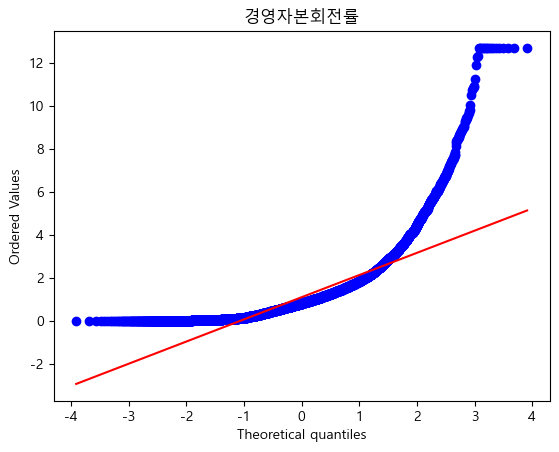

In [416]:
i = 37
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

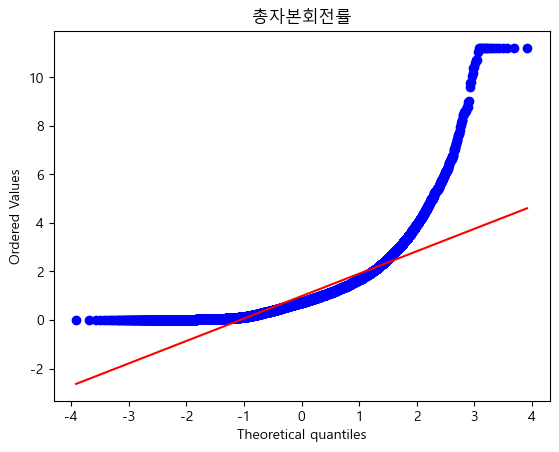

In [417]:
i = 38
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

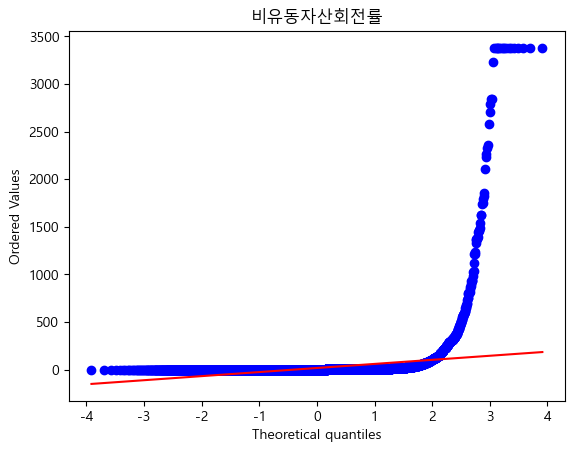

In [418]:
i = 39
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

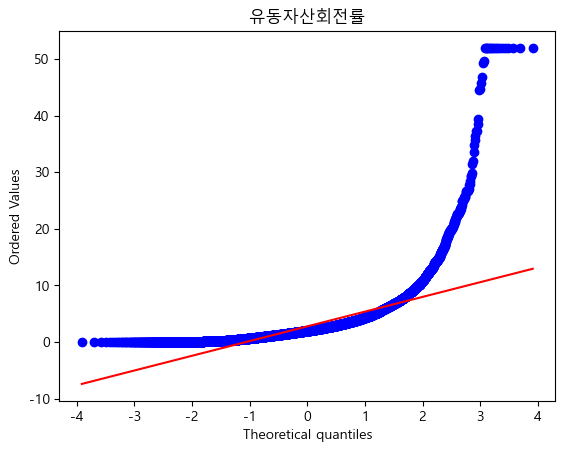

In [419]:
i = 40
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

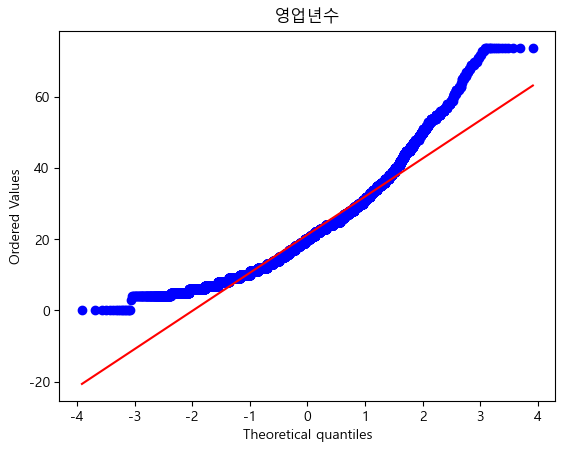

In [420]:
i = 41
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.9)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

## after QQplot

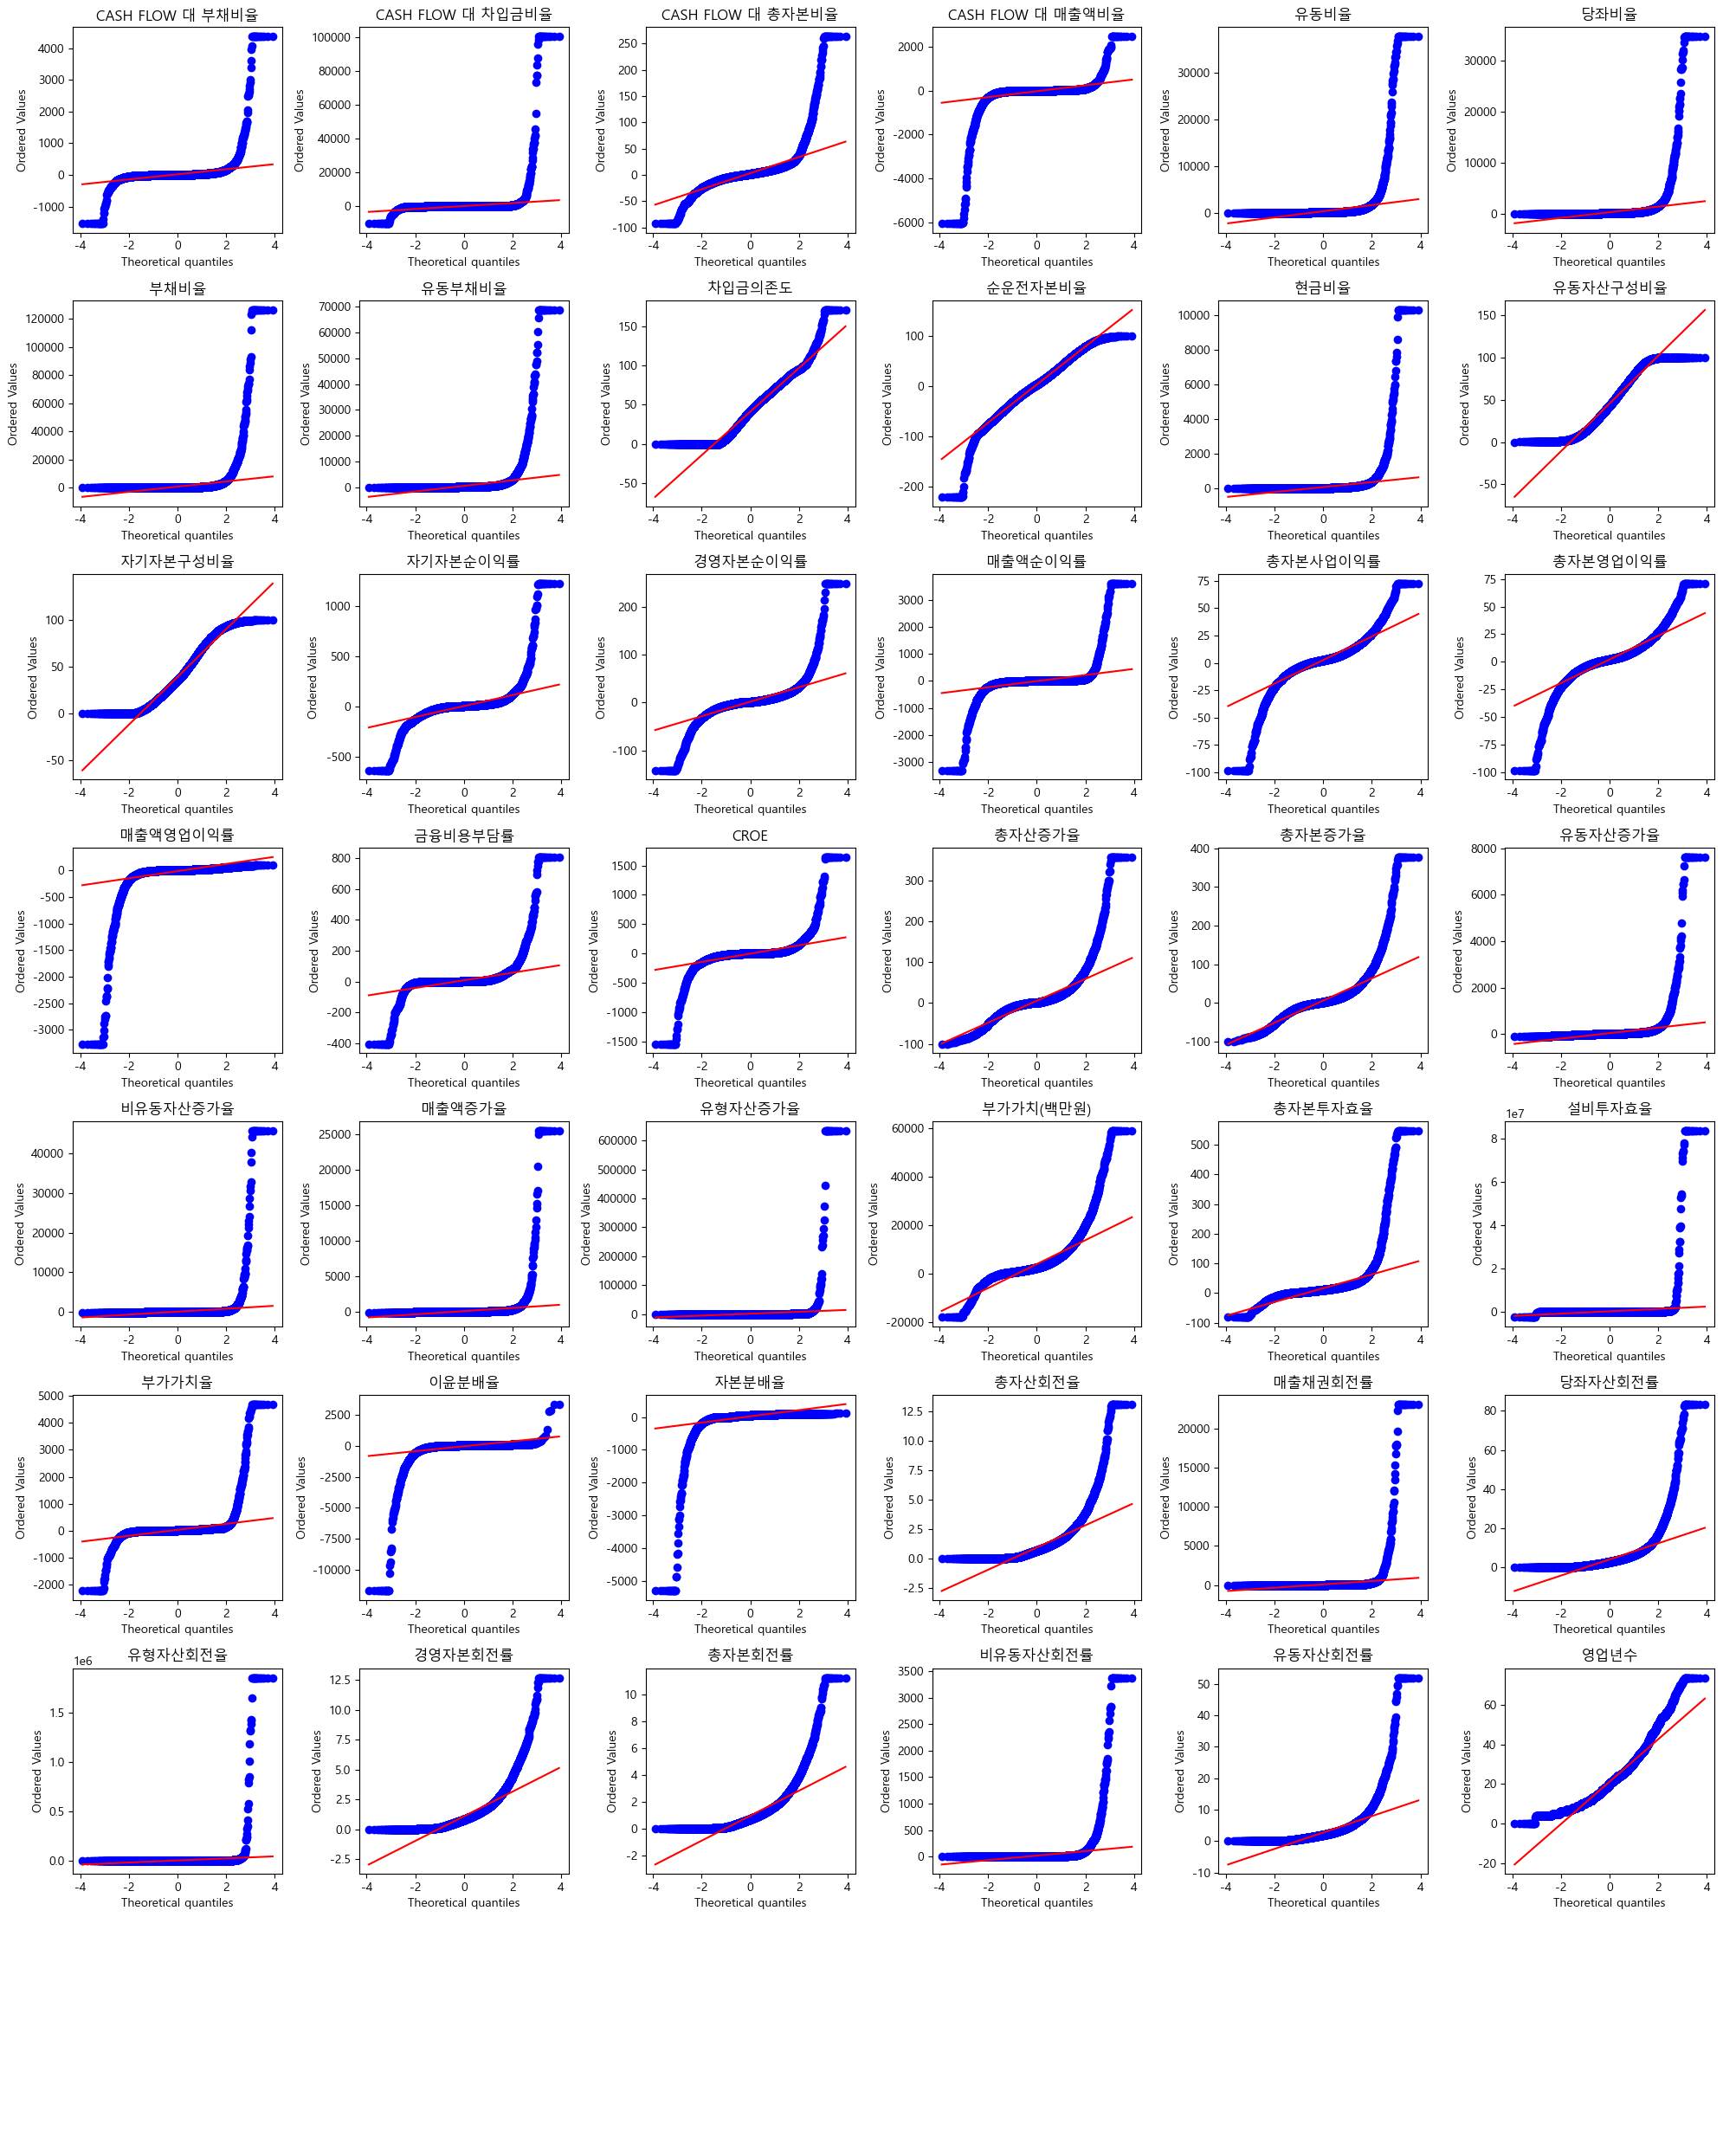

In [421]:
qq_plot(winsorized_features)

# to_csv

train set

In [33]:
all_X_train[features.columns] = adj_features

In [34]:
all_X_train.to_csv('../data/datasets/winsoried_all_train.csv', index=False)